In [1]:
import parse
import analyse
import matplotlib.pyplot as plt
import numpy as np

In [2]:
benchmarks = [
"results/ACASXU_run2a_1_1_batch_2000-retrain-1-0.05",
"results/ACASXU_run2a_1_1_batch_2000-student-1-0.05",
"results/ACASXU_run2a_1_2_batch_2000-retrain-1-0.05",
"results/ACASXU_run2a_1_2_batch_2000-student-1-0.05",
"results/mnist8x8_100_80_60_40_20_10_eps1-9000.2-15",
"results/mnist8x8_student_36_10-9000.7-top",
"results/mnist8x8_student_12_12_12_10-9000.7-top",
"results/mnist8x8_100_80_60_40_20_10-9200.3-top",
#"results/mnist8x8_100_80_60_40_20_10-9200.5-top",
"results/mnist8x8_100_200_300_200_100_10-9200.2-top"
]
variants = [
    'DONT',
    'REFINE_UNTIL_LAST_OPTIMISTIC1',
    'REFINE_UNTIL_MAX',
    'CEGAR_OPTIMAL'
]
commit = '3ad4254'
out_handlers=[parse.CegarOptimal]
err_handlers=[parse.RunLim]
both_handlers=[parse.NNEquivResultHandler]
num_runs=3

In [3]:
variant_runs = {}
for v in variants:
    variant_runs[v]={}
    for b in benchmarks:
        variant_runs[v][b]=[]
        for i in range(1,num_runs+1):
            try:
                variant_runs[v][b].append(
                    parse.BenchmarkRun(
                        "../"+b+"-"+v+"/"+str(i)+"/nnequiv-"+commit+"/stdout.log",
                        "../"+b+"-"+v+"/"+str(i)+"/nnequiv-"+commit+"/stderr.log",
                        out_handlers=out_handlers,
                        err_handlers=err_handlers,
                        both_handlers=both_handlers
                    )
                )
            except (FileNotFoundError, Exception):
                print(f"Count not find "+b+"-"+v+"/"+str(i)+"/nnequiv-"+commit+"/stdout.log")

In [4]:
v = "CEGAR_OPTIMAL"
commit = '7c76ed1'
variant_runs["CEGAR+LP"]={}
for b in benchmarks:
    variant_runs["CEGAR+LP"][b]=[]
    for i in range(1,num_runs+1):
        try:
            variant_runs["CEGAR+LP"][b].append(
                parse.BenchmarkRun(
                    "../"+b+"-"+v+"/"+str(i)+"/nnequiv-"+commit+"/stdout.log",
                    "../"+b+"-"+v+"/"+str(i)+"/nnequiv-"+commit+"/stderr.log",
                    out_handlers=out_handlers,
                    err_handlers=err_handlers,
                    both_handlers=both_handlers
                )
            )
        except FileNotFoundError:
            print(f"Count not find "+b+"-"+v+"/"+str(i)+"/nnequiv-"+commit+"/stdout.log")

In [5]:
variants = [
    'DONT',
    'REFINE_UNTIL_LAST_OPTIMISTIC1',
    'REFINE_UNTIL_MAX',
    'CEGAR_OPTIMAL',
    'CEGAR+LP'
]
variants_median = {}
for v in variants:
    variants_median[v]={}
    for b in benchmarks:
        variants_median[v][b]=parse.AggregateRun(variant_runs[v][b])

print(variants_median["DONT"]["results/ACASXU_run2a_1_1_batch_2000-retrain-1-0.05"].get_val(['runlim','real']))

2722.8


In [6]:
from cycler import cycler

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ACAS_1_1-retrain
[2722.8, 416.57217793539166, 199.06770561356097, 167.45, 51.48302748333663, 1155.42]
ACAS_1_1-student
[4379.92, 145.12994543928653, 90.90861397609115, 84.85, 28.728671239688993, 1143.36]
ACAS_1_2-retrain
[4518.9, 799.3789212023839, 376.5913830297068, 326.59, 102.30615539010614, 1845.85]
ACAS_1_2-student
[1985.11, 198.48279172647744, 130.5700579583645, 109.46, 41.01837076898664, 606.54]
MNIST_large-epsilon
[10800.1, 30.83175779413432, 29.014178925193846, 35.9, 14.358728226274252, 2388.95]
MNIST_small-top
[7417.15, 11.888817532919347, 10.889101368375123, 14.39, 6.05114259570837, 363.27]
MNIST_medium-top
[966.24, 80.19623773172498, 80.619110471569, 94.51, 50.79068117123097, 834.81]
MNIST_large-top
[10800.08, 10.62180051766336, 9.416328094899654, 13.02, 5.476410090923309, 52.61]
MNIST_larger-top
[10800.09, 796.0038533173501, 704.3375076772645, 706.56, 334.4269396336749, 10800.1]


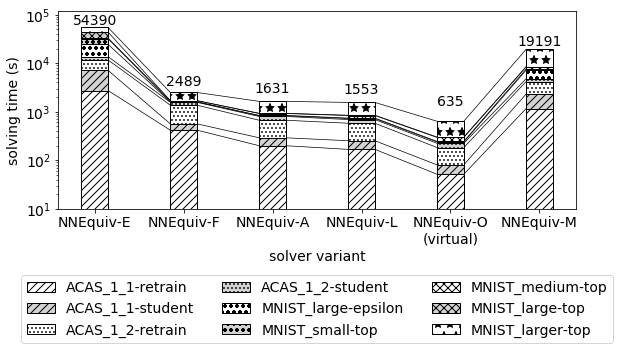

In [7]:
#'--'
#bar_cycle = (cycler('hatch', ['///', '...','oo', 'xxx', '**', '|||', '+++','\\\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
bar_cycle = (cycler('hatch', ['///', '...','oo', 'xxx', '*']) * cycler('color', ['w','lightgrey'])*cycler('zorder', [10]))
styles = bar_cycle()
variants = [
    'DONT',
    'CEGAR+LP',
    'CEGAR-LP',
    'REFINE_UNTIL_LAST_OPTIMISTIC1',
    'OPTIMAL',
    'REFINE_UNTIL_MAX',
]
labels = [
    'NNEquiv-E',
    'NNEquiv-F',
    'NNEquiv-A',
    'NNEquiv-L',
    'NNEquiv-O\n(virtual)',
    'NNEquiv-M',
]
benchmarks_labels = {
"results/ACASXU_run2a_1_1_batch_2000-retrain-1-0.05":"ACAS_1_1-retrain",
"results/ACASXU_run2a_1_1_batch_2000-student-1-0.05":"ACAS_1_1-student",
"results/ACASXU_run2a_1_2_batch_2000-retrain-1-0.05":"ACAS_1_2-retrain",
"results/ACASXU_run2a_1_2_batch_2000-student-1-0.05":"ACAS_1_2-student",
"results/mnist8x8_100_80_60_40_20_10_eps1-9000.2-15":"MNIST_large-epsilon",
"results/mnist8x8_student_36_10-9000.7-top":"MNIST_small-top",
"results/mnist8x8_student_12_12_12_10-9000.7-top":"MNIST_medium-top",
"results/mnist8x8_100_80_60_40_20_10-9200.3-top":"MNIST_large-top",
"results/mnist8x8_100_80_60_40_20_10-9200.5-top":"MNIST_large-top(.5)",
"results/mnist8x8_100_200_300_200_100_10-9200.2-top":"MNIST_larger-top"
}
plt.rcParams.update({'font.size': 14})
width=0.3
fig = plt.figure(figsize=(9,5))
ax  = fig.add_subplot(111)
ax.set_position([0.12,0.4,0.8,0.55])
bottom = [0.0]*len(labels)
print(bottom)
for b in benchmarks:
    vals = []
    last_val = None
    for i,l in enumerate(variants):
        if l == 'CEGAR-LP' or l == 'CEGAR+LP':
            if l == 'CEGAR-LP':
                v = variants_median['CEGAR_OPTIMAL'][b].get_val(['cegaropt','cegar'],strategy='M')
            else:
                v = variants_median['CEGAR+LP'][b].get_val(['cegaropt','cegar'],strategy='M')
            if v is not None:
                vals.append(v)
            else:
                print("Ignoring CEGAR for "+b)
        elif l == 'OPTIMAL':
            v = variants_median['CEGAR_OPTIMAL'][b].get_val(['cegaropt','opt'],strategy='M')
            if v is not None:
                vals.append(v)
            else:
                vals.append(0)
                print("Excluding OPTIMAL "+b)
        else:
            v = variants_median[l][b].get_val(['runlim','real'],strategy='M')
            if v is None:
                vals.append(0)
            else:
                vals.append(v)
        if i >= 1 and v is not None and last_val is not None:
            ax.plot([i-1+(width/2),i-(width/2)],[last_val+bottom[i-1], v+bottom[i]],color='black',linewidth=0.7)
        last_val=v
    print(benchmarks_labels[b])
    print(vals)
    ax.bar(labels, vals, 0.3, label=benchmarks_labels[b], bottom=bottom, linewidth=1, edgecolor='black', **next(styles))
    #ax.plot(labels, vals, label=benchmarks_labels[b], linewidth=1,zorder=10)
    bottom=np.array(bottom)+np.array([v if v is not None else 0 for v in vals])
for i, b in enumerate(bottom):
    ax.text(i, b+500,
                f"{b:.0f}",
                ha='center', va='bottom', rotation=0)
ax.set_yscale('log')
#fig.set_figwidth(8)
#fig.set_figheight(4)
#plt.ylim((5,90000))
plt.ylim((10,120000))
ax.set_ylabel('solving time (s)')
ax.set_xlabel('solver variant')
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.3),ncol=3)
plt.show()
fig.savefig('versions.png',dpi=400)